In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

# from warnings import filterwarnings

# filterwarnings('ignore')



In [2]:
# Load the Titanic dataset
titanic_df = pd.read_csv('train.csv')

# Drop columns that are not useful for prediction
titanic_df = titanic_df.drop(['Name', 'Cabin'], axis=1)



In [3]:
# Handle missing values
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)




In [4]:
# Convert categorical variables to numerical
encoder = LabelEncoder()
titanic_df['Sex'] = encoder.fit_transform(titanic_df['Sex'])
titanic_df['Embarked'] = encoder.fit_transform(titanic_df['Embarked'])
titanic_df['Ticket'] = encoder.fit_transform(titanic_df['Ticket'])



In [5]:
# Define features and target variable
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']




In [6]:
numeric_cols = X.select_dtypes(np.number).columns.to_list()

scaler = MinMaxScaler()

scaler.fit(X[numeric_cols])

X[numeric_cols] = scaler.transform(X[numeric_cols])

In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

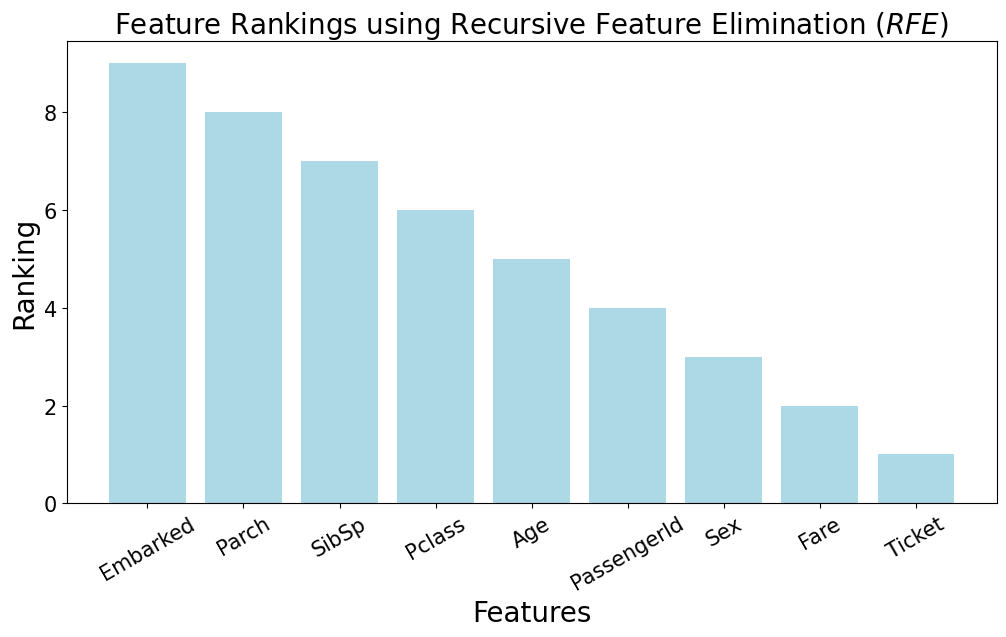

In [8]:
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=1)

# lr = LogisticRegression(solver='liblinear', random_state=123)

# Initialize Recursive Feature Elimination (RFE) with Random Forest classifier
rfe = RFE(estimator=rf_classifier, n_features_to_select=1, step=1)

# Fit RFE
rfe.fit(X_train, y_train)

# Get feature rankings
feature_rankings = rfe.ranking_

weights_df = pd.DataFrame({
    'features': X.columns,
    'weights': feature_rankings
})

weights_df.sort_values(['weights'], ascending=False,inplace=True)

# Plot relative feature rankings
plt.figure(figsize=(12, 6))
plt.bar(weights_df['features'], weights_df['weights'], color='lightblue')
plt.xlabel('Features', fontsize=20)
plt.ylabel('Ranking', fontsize=20)
plt.title('Feature Rankings using Recursive Feature Elimination $(RFE)$', fontsize=20)
plt.savefig('rfe.png')
plt.xticks(fontsize=15, rotation=30)
plt.yticks(fontsize=15)
plt.show()

In [9]:
# X_train.columns[:][rfe.support_]
rfe.ranking_

array([4, 6, 3, 5, 7, 8, 1, 2, 9])

In [10]:
feats = weights_df['features'].unique()

In [11]:
hey = []
threshold = 0.75
for i in range(len(feats)):
    hey.append(feats[i])
    tts = X_train[hey]
    model = LogisticRegression(random_state=42).fit(tts, y_train)
    predictions = model.predict(X_test[hey])
    accuracy = accuracy_score(y_test, predictions)

    print(f"Features: {hey}\t Accuracy: {accuracy}")

Features: ['Embarked']	 Accuracy: 0.6256983240223464
Features: ['Embarked', 'Parch']	 Accuracy: 0.6256983240223464
Features: ['Embarked', 'Parch', 'SibSp']	 Accuracy: 0.5810055865921788
Features: ['Embarked', 'Parch', 'SibSp', 'Pclass']	 Accuracy: 0.6927374301675978
Features: ['Embarked', 'Parch', 'SibSp', 'Pclass', 'Age']	 Accuracy: 0.7206703910614525
Features: ['Embarked', 'Parch', 'SibSp', 'Pclass', 'Age', 'PassengerId']	 Accuracy: 0.7206703910614525
Features: ['Embarked', 'Parch', 'SibSp', 'Pclass', 'Age', 'PassengerId', 'Sex']	 Accuracy: 0.7988826815642458
Features: ['Embarked', 'Parch', 'SibSp', 'Pclass', 'Age', 'PassengerId', 'Sex', 'Fare']	 Accuracy: 0.7988826815642458
Features: ['Embarked', 'Parch', 'SibSp', 'Pclass', 'Age', 'PassengerId', 'Sex', 'Fare', 'Ticket']	 Accuracy: 0.7932960893854749
